## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Step 1 - Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [18]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline

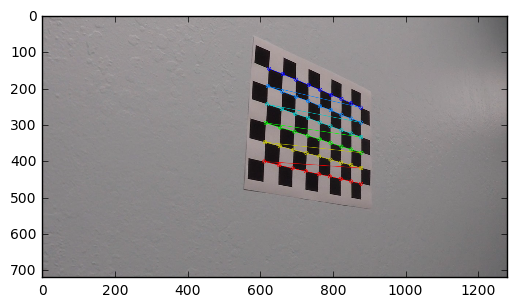

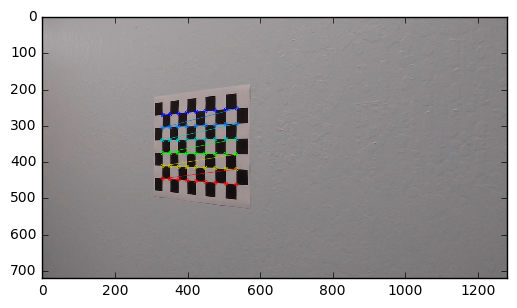

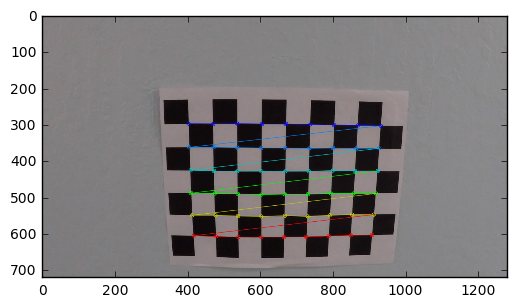

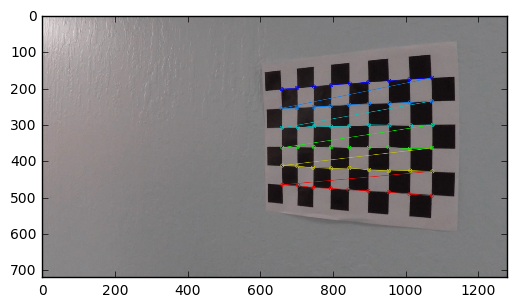

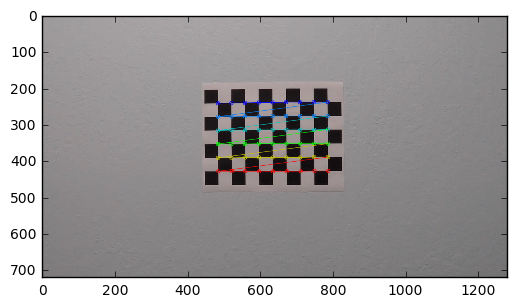

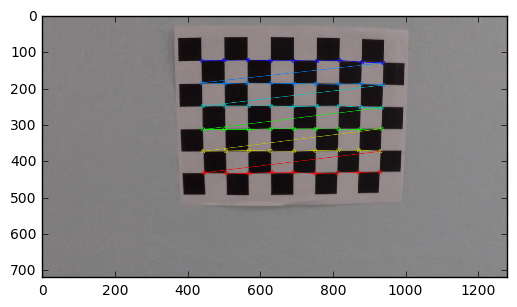

not found


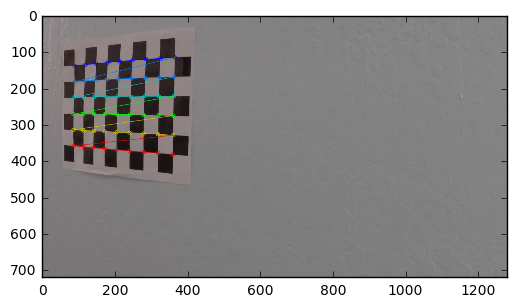

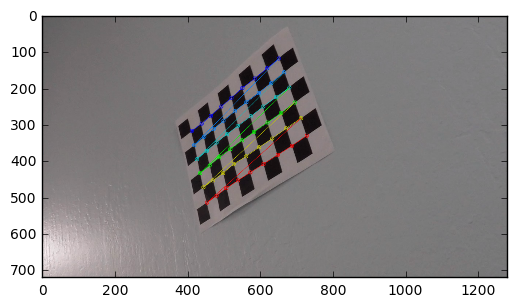

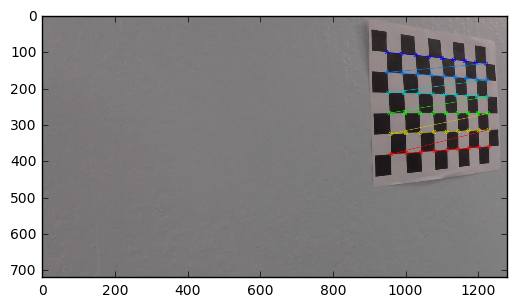

not found


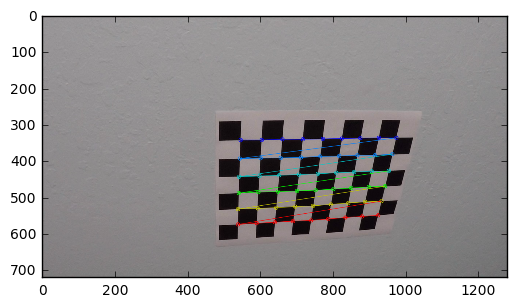

not found


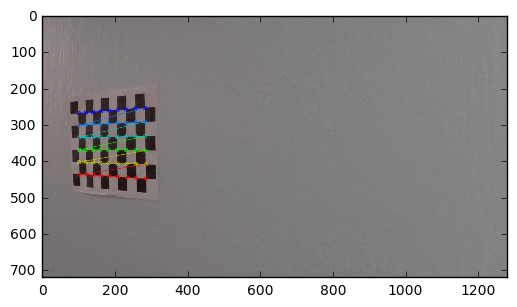

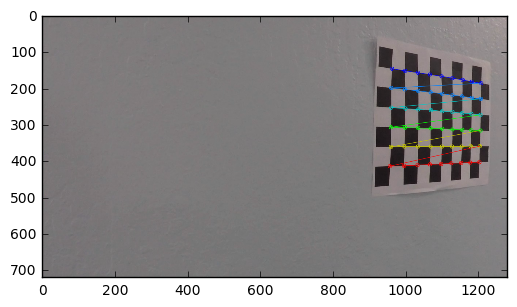

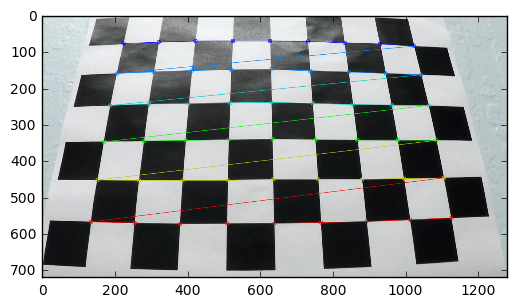

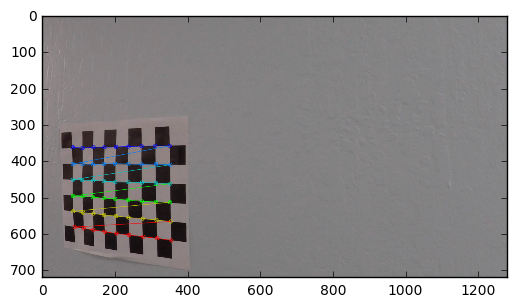

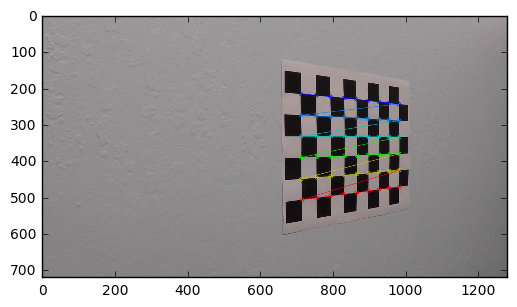

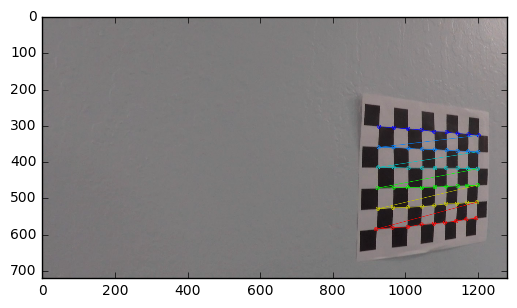

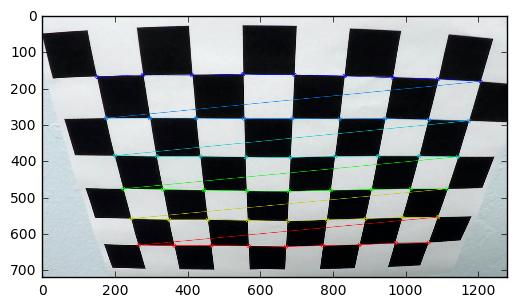

In [8]:
def calibrate_camera():
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob('../camera_cal/calibration*.jpg')

    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            #cv2.imshow('img',img)
            #cv2.waitKey(500)
            plt.figure()
            plt.imshow(img)
            plt.show()
        else:
            print('not found')
    #cv2.destroyAllWindows()
    return objpoints, imgpoints

objpoints, imgpoints = calibrate_camera()

## Step2 - Apply a distortion correction to raw images.

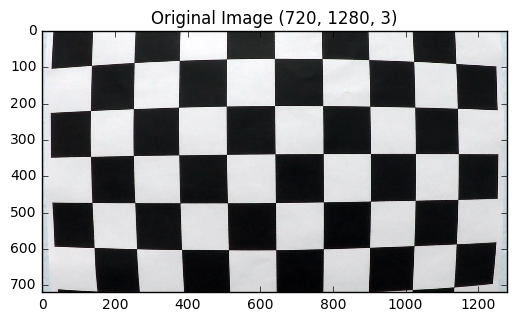

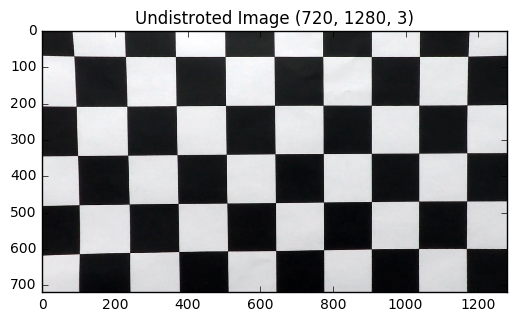

In [22]:
def undistort_image(objpoints, imgpoints, src_img):

    img_size = (src_img.shape[1], src_img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    result = cv2.undistort(src_img, mtx, dist, None, mtx)
    return result

original_img = cv2.imread('../camera_cal/calibration1.jpg')
plt.figure()
plt.title('Original Image {}'.format(original_img.shape))
plt.imshow(original_img)

undistorted_img = undistort_image(objpoints, imgpoints, original_img)
plt.figure()
plt.title('Undistroted Image {}'.format(undistorted_img.shape))
plt.imshow(undistorted_img)


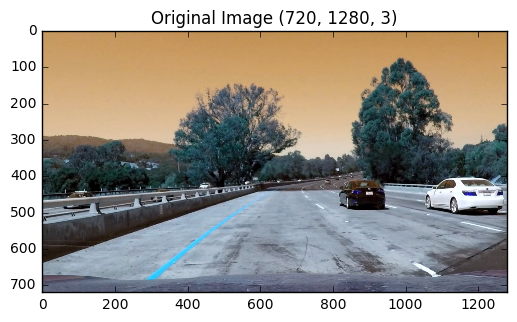

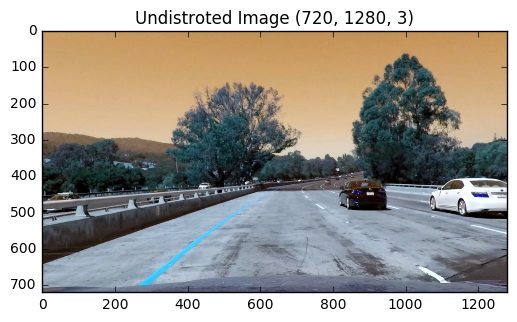

In [24]:
def undistort_image(objpoints, imgpoints, src_img):

    img_size = (src_img.shape[1], src_img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    result = cv2.undistort(src_img, mtx, dist, None, mtx)
    return result

original_img = cv2.imread('../test_images/test1.jpg')
plt.figure()
plt.title('Original Image {}'.format(original_img.shape))
plt.imshow(original_img)

undistorted_img = undistort_image(objpoints, imgpoints, original_img)
plt.figure()
plt.title('Undistroted Image {}'.format(undistorted_img.shape))
plt.imshow(undistorted_img)

## Step3 - Use color transforms, gradients, etc., to create a thresholded binary image.

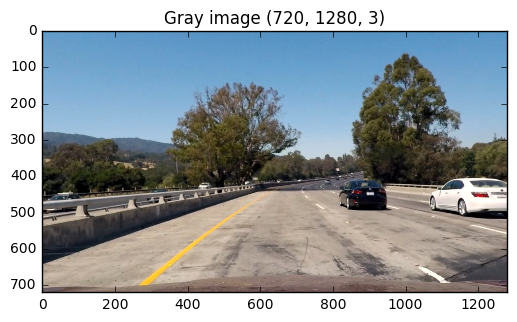

In [16]:
gray_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.title('Gray image {}'.format(gray_img.shape))
plt.imshow(gray_img)